<a href="https://colab.research.google.com/github/gokulraj2004/Deep_Learning_projects/blob/main/21bai1175_GOKULRAJ_ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
df=pd.read_csv("/content/perceptron_sampledata.csv")

In [ ]:
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [ ]:
x=df.drop('label',axis=1).values
y=df['label'].values

In [ ]:
x

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=2,hidden1=2,hidden2=2,out_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, hidden1)
        self.layer2=nn.Linear(hidden1, hidden2)
        self.out=nn.Linear(hidden2, out_features)
    def forward(self,x):
        x=F.tanh(self.layer1(x))
        x=F.tanh(self.layer2(x))
        x=self.out(x)
        return x

In [ ]:
torch.manual_seed(3)
model=ANN_Model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (layer1): Linear(in_features=2, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=2, bias=True)
  (out): Linear(in_features=2, out_features=2, bias=True)
)>

In [ ]:
loss_funtion=nn.CrossEntropyLoss()
optimizer=torch.optim.ASGD(model.parameters(),lr=0.01)

In [ ]:
epochs=200
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_funtion(y_pred,y_train)
    final_losses.append(loss.item())
    print("Epoch: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 and the loss : 0.8289973139762878
Epoch: 2 and the loss : 0.8251489996910095
Epoch: 3 and the loss : 0.8213186860084534
Epoch: 4 and the loss : 0.8175064325332642
Epoch: 5 and the loss : 0.8137116432189941
Epoch: 6 and the loss : 0.8099340200424194
Epoch: 7 and the loss : 0.8061732649803162
Epoch: 8 and the loss : 0.8024289011955261
Epoch: 9 and the loss : 0.7987009882926941
Epoch: 10 and the loss : 0.7949889302253723
Epoch: 11 and the loss : 0.791292667388916
Epoch: 12 and the loss : 0.7876115441322327
Epoch: 13 and the loss : 0.7839456796646118
Epoch: 14 and the loss : 0.7802945971488953
Epoch: 15 and the loss : 0.7766581773757935
Epoch: 16 and the loss : 0.7730358839035034
Epoch: 17 and the loss : 0.7694277763366699
Epoch: 18 and the loss : 0.7658333778381348
Epoch: 19 and the loss : 0.7622524499893188
Epoch: 20 and the loss : 0.7586849927902222
Epoch: 21 and the loss : 0.7551306486129761
Epoch: 22 and the loss : 0.7515890598297119
Epoch: 23 and the loss : 0.748060166835784

Text(0.5, 0, 'Epoch')

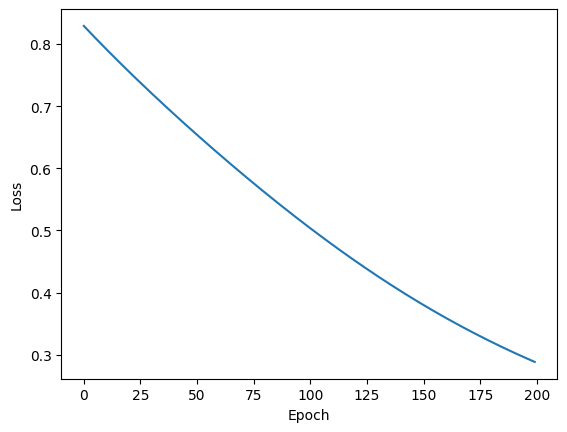

In [ ]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_prod=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

3
3
3
3
